1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [7]:
def dec_to_bin(decimal):
    if decimal == 0:
        return '0b0'
    binary = ''
    while decimal > 0:
        binary = str(decimal % 2) + binary
        decimal = decimal // 2
    return '0b' + binary

def bin_to_dec(binary):
    binary = binary[2:]  # Remove '0b' prefix
    decimal = 0
    for digit in binary:
        decimal = decimal * 2 + int(digit)
    return decimal

def dec_to_hex(decimal):
    hex_chars = "0123456789ABCDEF"
    if decimal == 0:
        return '0x0'
    hex_str = ''
    while decimal > 0:
        hex_str = hex_chars[decimal % 16] + hex_str
        decimal = decimal // 16
    return '0x' + hex_str

def hex_to_dec(hexadecimal):
    hex_chars = "0123456789ABCDEF"
    hexadecimal = hexadecimal[2:]  # Remove '0x' prefix
    decimal = 0
    for digit in hexadecimal:
        decimal = decimal * 16 + hex_chars.index(digit)
    return decimal

def bin_to_hex(binary):
    decimal = bin_to_dec(binary)
    return dec_to_hex(decimal)

def hex_to_bin(hexadecimal):
    decimal = hex_to_dec(hexadecimal)
    return dec_to_bin(decimal)

# Example usage:
print(dec_to_bin(16))  # Convert decimal to binary
print(bin_to_dec('0b11001'))  # Convert binary to decimal
print(dec_to_hex(255))  # Convert decimal to hexadecimal
print(hex_to_dec('0xFF'))  # Convert hexadecimal to decimal
print(bin_to_hex('0b110110'))  # Convert binary to hexadecimal
print(hex_to_bin('0xAA'))  # Convert hexadecimal to binary


0b10000
25
0xFF
255
0x36
0b10101010


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [1]:
n32 = "11000000001111111000110010101010"

bias=127
sign = int(n32[0])
exp = (n32[1:9])
mant = (n32[9:])
frac=1

for i in range(1,24):
    frac +=  int(mant[i-1])*2**(-i)

print("The initial was " , n32 ,"\n")
print("Coverting in single precision floating point -> ", (-1)**(sign) * frac * 2**(int(exp,2) - bias))

The initial was  11000000001111111000110010101010 

Coverting in single precision floating point ->  -2.9929604530334473


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [1]:
previousprevious = 0
previous = 0
current  = 1. 

while(current > previous):
    previousprevious = previous
    previous = current
    current *= 2

print("Overflow limit: ", previousprevious)    

Overflow limit:  8.98846567431158e+307


In [2]:
previousprevious = 0
previous = 2
current  = 1.

while(current < previous):
    previousprevious = previous
    previous = current
    current /= 2

print("Underflow limit: ", previousprevious)    

Underflow limit:  5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [5]:
N=100
a=1.0
for n in range(N) :
    b=a+1*pow(10,-n)
    c=b-a
    if c==0:
        print("The machine precision is:", pow(10,-n))
        break 

The machine precision is: 1e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [6]:
from math import sqrt

#a
def f(a,b,c):
    x1=(-b + sqrt(pow(b,2)-4*c*a))/(2*a)
    x2=(-b - sqrt(pow(b,2)-4*c*a))/(2*a)
    print("The equation is:" ,a,"x^2 "," +","",b,"x", " +", "", c, "=0" )
    print("The two solutions are:","x1=", x1, "and","x2=", x2)
    
f(0.001,1000,0.001)


The equation is: 0.001 x^2   +  1000 x  +  0.001 =0
The two solutions are: x1= -9.999894245993346e-07 and x2= -999999.999999


In [7]:
#b
def f2(a,b,c):
    x1=(2*c)/((-b + sqrt(pow(b,2)-4*c*a)))
    x2=(2*c)/((-b - sqrt(pow(b,2)-4*c*a)))
    print("The equation is:" ,a,"x^2 "," +","",b,"x", " +", "", c, "=0" )
    print("The two solutions are:","x1=", x1, "and","x2=", x2)
    
f2(0.001,1000,0.001)

The equation is: 0.001 x^2   +  1000 x  +  0.001 =0
The two solutions are: x1= -1000010.5755125057 and x2= -1.000000000001e-06


We can see that the accurancy changes. They have the same order of magnitude but the accurancy in the first case is way better than in the second one. Therefore there is an roundoff error comparing the two . We got problems in subtracting numbers really closed by in value and also in the distributive law.

In [8]:
#c 
# Python program to find roots of quadratic equation

import math 
  
  
 #function for finding roots
def equationroots( a, b, c): 
    
    
    # calculating discriminant using formula
    dis = b * b - 4 * a * c 
    sqrt_val = math.sqrt(abs(dis)) 
      
    if a==0:
        print("You didn't write a quadratic equation!")
        print("You have just one solution: x=", -c/b)
        
    # checking condition for discriminant
    elif dis > 0 : 
        print(" real and different roots ") 
        print((-b + sqrt_val)/(2 * a)) 
        print((-b - sqrt_val)/(2 * a)) 
      
    elif dis == 0: 
        print(" real and same roots") 
        print(-b / (2 * a)) 
      
    # when discriminant is less than 0
    else:
        print("Complex Roots") 
        print(- b / (2 * a), " + i", sqrt_val) 
        print(- b / (2 * a), " - i", sqrt_val) 
        
  
equationroots( 0.001, 1000, 0.001)

 real and different roots 
-9.999894245993346e-07
-999999.999999


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

delta 	 computed df	 analytic df
1e-02 	 1.010000000 	 1.0000000
1e-04 	 1.000100000 	 1.0000000
1e-06 	 1.000001000 	 1.0000000
1e-08 	 1.000000004 	 1.0000000
1e-10 	 1.000000083 	 1.0000000
1e-12 	 1.000088901 	 1.0000000
1e-14 	 0.999200722 	 1.0000000


Text(0.5, 0, 'delta')

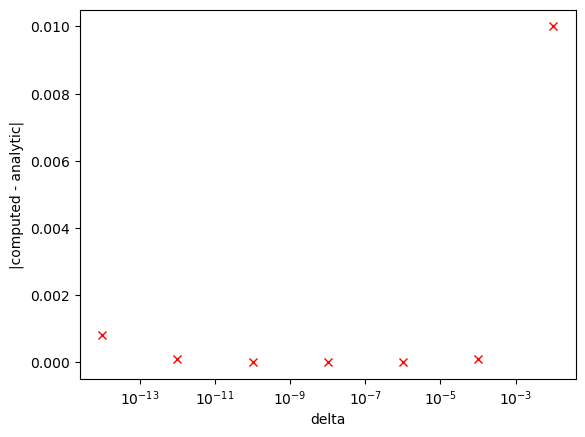

In [4]:
import numpy as np
delta = 10**-2

def f(x):
    return x*(x-1)

def df(x):
    return 2*x-1

compDer = []
anDer   = []
deltas  = []
#print("legend: computed derivative-> $d_c(f)$, analytic derivative-> $d_a(f)$\n")
print("delta \t computed df\t analytic df")
for i in range(7):
    x = 1
    derivative = (f(x+delta)-f(x))/delta
    print("%.e \t %10.9f \t %8.7f"%(delta, derivative, df(x)))#, derivative, df(x))
    anDer.append(df(x))
    compDer.append(derivative)
    deltas.append(delta)
    delta /= 10**2
    
from matplotlib import pyplot as plt
plt.xscale('log')
plt.plot(deltas, abs(np.array(compDer)-np.array(anDer)), "rx")
plt.ylabel("|computed - analytic|")
plt.xlabel("delta")

It's evident that the two derivatives will not agree perfectly due to the discretization of $\delta$, the intersting fact is that we will expect an increasing accuracy for smaller $\delta$ but that's not what we observe. In fact, as $\delta$ becomes smaller, the function $\frac{f(x+\delta)-f(x)}{\delta}$ becomes poorly conditioned, i.e. big variations in output for small input variation.

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [11]:
#a

import math as m

def f(x):
    return m.sqrt(1 - x**2)

def integral(N):
    integ=0
    for k in range (1,N+1):
        integ+=(2/N)*(f(-1 +(2/N)*k))
    return integ

#a)

print("Calculated value of the Integral is = " , integral(100))
print("Correct value is pi/2 = ",  m.pi/2)
print("Comparation: % change = ", 100* (m.pi/2 - integral(100))/(m.pi/2) , "%")


Calculated value of the Integral is =  1.5691342555492505
Correct value is pi/2 =  1.5707963267948966
Comparation: % change =  0.10581074180619238 %


In [13]:
#b

#less than a second

%timeit integral(1*10**6)

print("Calculated value of the Integral is = " , integral(2*10**6))
print("Correct value is pi/2 = ",  m.pi/2)
print("Comparation: % change = ", 2*10**6* (m.pi/2 - integral(2*10**6))/(m.pi/2) , "%")



789 ms ± 24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Calculated value of the Integral is =  1.5707963262069677
Correct value is pi/2 =  1.5707963267948966
Comparation: % change =  0.0007485742189653666 %


In [14]:
#b

#more than a miinute

%timeit integral(2*10**8)

print("Calculated value of the Integral is = " , integral(2*10**8))
print("Correct value is pi/2 = ",  m.pi/2)
print("Comparation: % change = ", 2*10**8* (m.pi/2 - integral(2*10**8))/(m.pi/2) , "%")

1min 36s ± 3.25 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
Calculated value of the Integral is =  1.5707963267944416
Correct value is pi/2 =  1.5707963267948966
Comparation: % change =  5.792850259838885e-05 %


As we can see the gain is due to the fact that the acccurancy improved a lot